### Differential Equation

$\frac{\mathrm{d}\Psi_1}{\mathrm{d}x} = \Psi_1,$

$\frac{\mathrm{d}\Psi_2}{\mathrm{d}x} = \Psi_1 - \Psi_2,$

$\Psi_1(0) = 1, \Psi_2(0) = 2, x \in [0, 2]$

In [1]:
from typing import List, Callable
import autograd.numpy as np

from neural_network import init_weights, forward
from optimizers import gradient_descent, adam
from activation_functions import elu, sigmoid, tanh, arctan
from plotting_tools import plot_ode, plot_system_ode

In [2]:
PSI_0 = np.array([1, 2])


def derivative(x, psi) -> np.ndarray:
    """Example #4 derivative.
    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_1_dot = psi[0]
    psi_2_dot = psi[0] - psi[1]
    return np.array([psi_1_dot, psi_2_dot])


def analytical_solution(x):
    """Analytical solution to example #4.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    psi_1 = np.exp(x)
    psi_2 = 0.5 * np.exp(x) + 1.5 * np.exp(-x)

    return np.array([psi_1, psi_2])


def trial_solution(
    t: np.array, weights_list: List[List[np.array]], activation_fns: List[Callable]
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights_list: A list of weights and biases for each neural networks

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(weights_list), len(t))
    """
    f = [
        forward(t, weights_list[i], activation_fns).reshape(t.size)
        for i in range(len(weights_list))
    ]
    return np.array([PSI_0[i] + t * f[i] for i in range(len(weights_list))])

### Training

Iteration:  0
 1.3952277263554396
Iteration:  1
 1.309365760122494
Iteration:  2
 1.2331427867220037
Iteration:  3
 1.1683310482883174
Iteration:  4
 1.1163601347149443
Iteration:  5
 1.0778948898298228
Iteration:  6
 1.0524148915944354
Iteration:  7
 1.0378948697971553
Iteration:  8
 1.0309768892339946
Iteration:  9
 1.0278013026163109
Iteration:  10
 1.02494601369883
Iteration:  11
 1.0199973452399185
Iteration:  12
 1.011689319686765
Iteration:  13
 0.9997551119372762
Iteration:  14
 0.9846599289636119
Iteration:  15
 0.9673280778979726
Iteration:  16
 0.9489084530209408
Iteration:  17
 0.9305800432711907
Iteration:  18
 0.9133864815650282
Iteration:  19
 0.898095814330921
Iteration:  20
 0.8850969608384845
Iteration:  21
 0.8743563850218603
Iteration:  22
 0.8654565110959782
Iteration:  23
 0.857716928011998
Iteration:  24
 0.8503692856174281
Iteration:  25
 0.8427359133584462
Iteration:  26
 0.8343642352690323
Iteration:  27
 0.8250904259595166
Iteration:  28
 0.8150309921306296
I

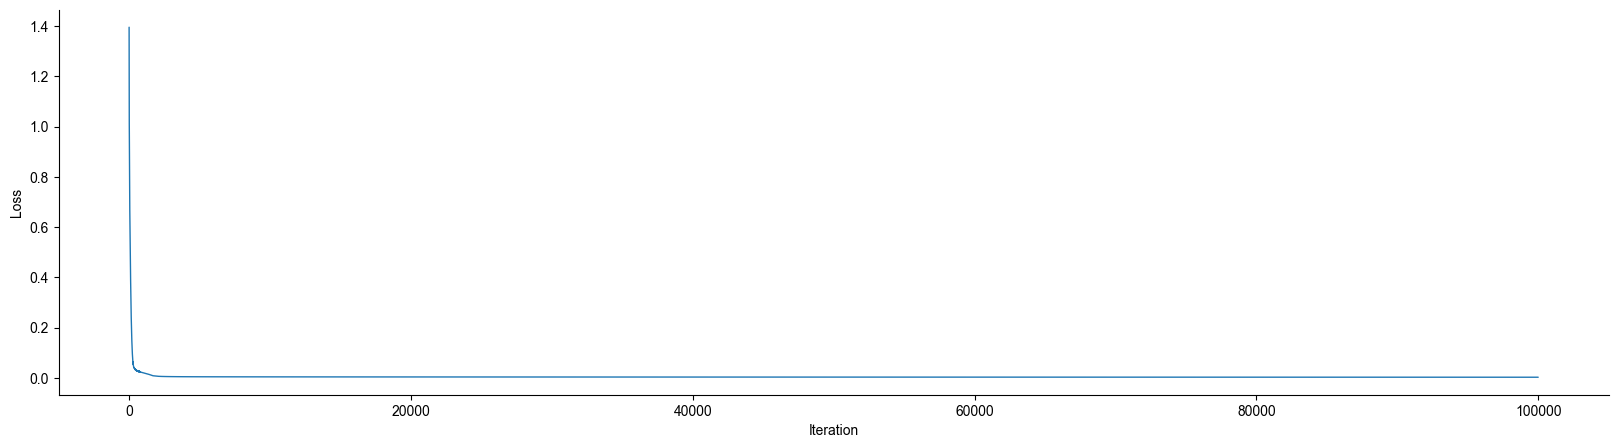

In [3]:
def train():
    t = np.arange(0, 2, 0.2)
    hidden_sizes = np.array([10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn_weights_1 = init_weights(1, hidden_sizes, 1)
    nn_weights_2 = init_weights(1, hidden_sizes, 1)
    adam(
        t,
        [nn_weights_1, nn_weights_2],
        activation_fns,
        trial_solution,
        derivative,
        num_iters=100000,
        step_size=0.01,
        threshold=0.001,
    )

    return [nn_weights_1, nn_weights_2], activation_fns


weights_list, activation_fns = train()

### Evaluating Results

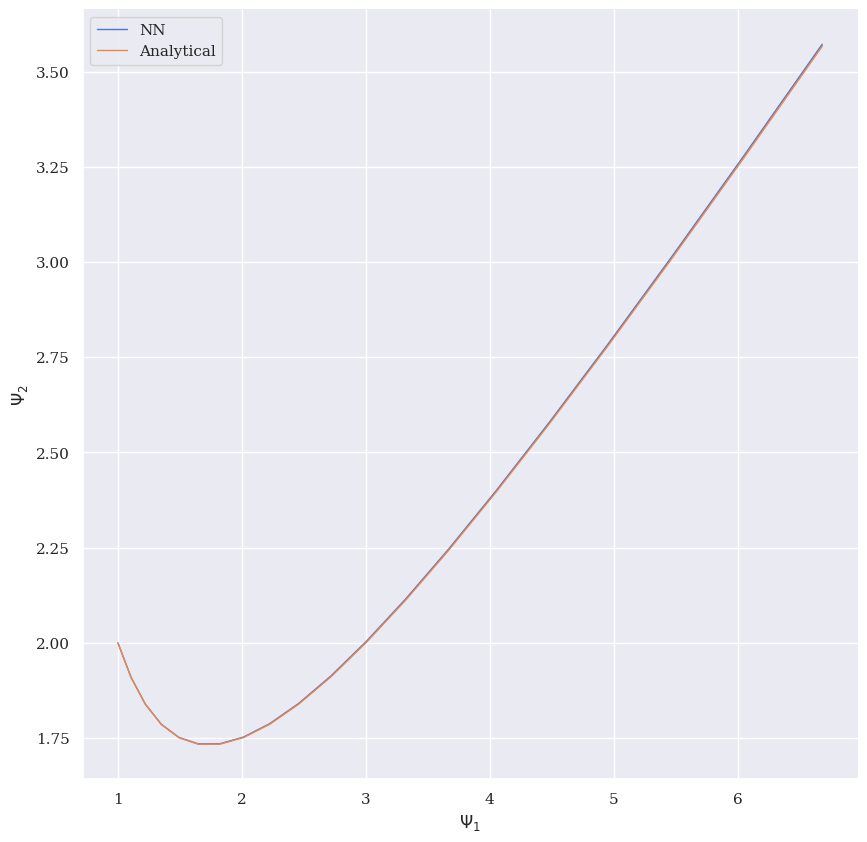

In [4]:
t = np.arange(0, 2, 0.1)
res = trial_solution(t, weights_list, activation_fns)
an_sol = analytical_solution(t)

plot_system_ode(res, an_sol)